# Supercharged-Pandas

This is demo repository to show the capabilities of  **`PandasAI`** python package.

## Steps to do the basic setup -

### *STEP 0*: Main requirements -

Make sure you have the following requirements to successfully execute the code:

1. A python environment with version 3.9 or above.
    > *IMPORTANT: PandasAI can work with python 3.9 onwards*
2. A python environment with the following dependencies installed -
    - notebook
    - ipywidgets
    - python-dotenv
    - **PandasAI**
    - pandas

### *STEP 1*: Get your Openai API key -

Create a `.env` file in the root of the project from the copy of `.env.template`.
And replace the OPENAI_API_KEY with your Openai API key

> NOTE: 1. You can obtain from - [OpenAI Keys](https://platform.openai.com/account/api-keys) 2. Refer the following screenshot - ![screenshot](../images/ss-openai-api-key.png)

### *STEP 2*: Initialize bash script for the project setup

run the following command-

```bash
bash init_setup.sh
```

> NOTE: Make sure you have gitbash intalled in your Windows laptop, otherwise for any other Linux based OS its not required

### STEP 3: Activate the environment

```bash
conda activate ./env
```

### STEP 4: Launch the jupyter notebook


## References -

1. [Pypi PandasAI](https://pypi.org/project/pandasai/)
2. [PandasAI github/docs](https://github.com/gventuri/pandas-ai)


---
# Demo -
### Neccessary imports

In [3]:
import os
import pandas as pd
from pandasai import PandasAI
from pandasai.llm.openai import OpenAI
from dotenv import load_dotenv
from pathlib import Path

load_dotenv()

True

### Load California housing data

In [4]:
data = Path("./data/housing.csv")
df = pd.read_csv(data)
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


### Read OPENAI_API_KEY

In [5]:
llm = OpenAI(api_token=os.getenv("OPENAI_API_KEY"))
pandas_ai = PandasAI(llm)

In [7]:
# Find median value of median house value

result = df["median_house_value"].median()

print(f">> PANDAS: The median value is: ${result:.2f}")

>> PANDAS: The median value is: $179700.00


In [10]:
# Find median value of median house value using PANDAS AI

prompt = "What's the median value of median_house_value?"

result = pandas_ai.run(df, prompt=prompt)

print(f">> PANDAS AI: {result}")

>> PANDAS AI: The median value of median_house_value is 179700 dollars.


In [12]:
average_income = df['median_income'].mean()

print(f">> PANDAS: The average income is ${average_income:.2f}")

>> PANDAS: The average income is $3.87


In [13]:
prompt = "Tell me average median_income"
response = pandas_ai.run(df, prompt=prompt)
print(f"** PANDAS AI: {response}")

** PANDAS AI: The average median income is around 3.87.


In [14]:
population_median_house_value_corr = df['population'].corr(df['median_house_value'])

print(f">> PANDAS: The correlation between population and median house value is {population_median_house_value_corr:.2f}")

>> PANDAS: The correlation between population and median house value is -0.02


In [15]:
prompt = "how much is the correlation between ppulation and median house value?"
response = pandas_ai.run(df, prompt=prompt)
print(f"** PANDAS AI: {response}")

** PANDAS AI: The correlation between population and median house value is very weak, with a value of -0.02464967888889502.


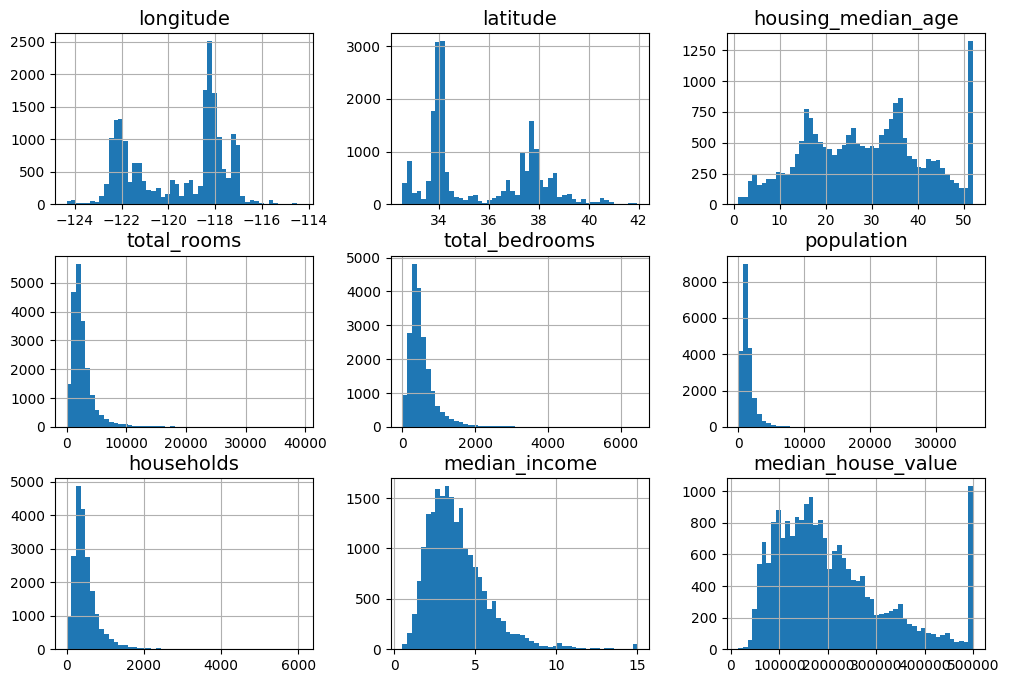

In [18]:
import matplotlib.pyplot as plt

# extra code – the next 5 lines define the default font sizes
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

df.hist(bins=50, figsize=(12, 8))
plt.show()

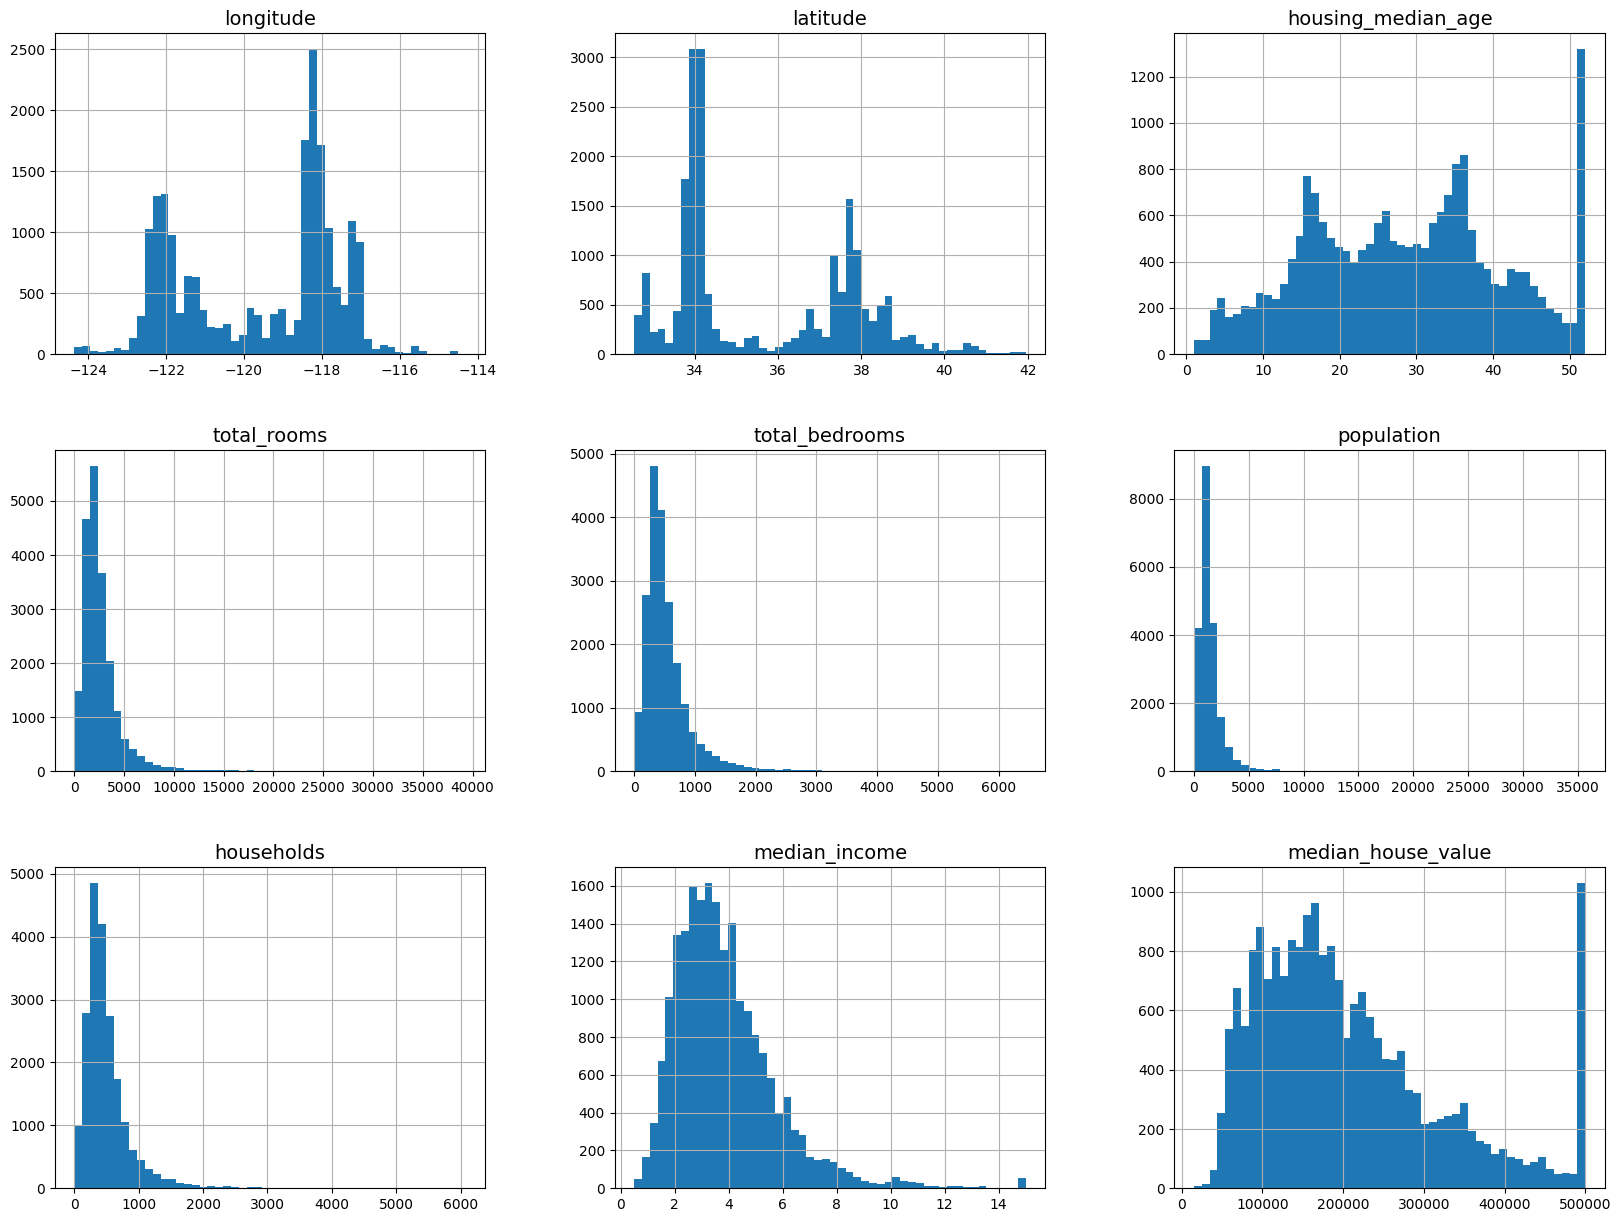

** PANDAS AI: Sure, I can help you with that! To plot a histogram for a dataset, we need to first determine the frequency of each value in the dataset and then group them into bins. Once we have the frequency and bin information, we can create a bar chart where the height of each bar represents the frequency of values in that bin. Would you like me to walk you through the steps or do you already have the frequency and bin information?


In [17]:
prompt = "plot the histogram for this dataset"
response = pandas_ai.run(df, prompt=prompt)
print(f"** PANDAS AI: {response}")

In [19]:
df.isna().sum().to_frame()

,0
longitude,0
latitude,0
housing_median_age,0
total_rooms,0
total_bedrooms,207
population,0
households,0
median_income,0
median_house_value,0
ocean_proximity,0


In [20]:
prompt = "is there any missing data in the dataset, \
tell me the column name and also how much data is missing?"
response = pandas_ai.run(df, prompt=prompt)
print(f"** PANDAS AI: {response}")

** PANDAS AI: Yes, there is missing data in the dataset. The column with missing data is "total_bedrooms" and there are 207 missing values.


In [21]:
df.total_bedrooms.skew()

3.4595463315233435

In [22]:
prompt = "calculate skewness in total bedrooms"
response = pandas_ai.run(df, prompt=prompt)
print(f"** PANDAS AI: {response}")

** PANDAS AI: The skewness in the total number of bedrooms is 3.46, indicating that the distribution is highly skewed towards larger values.
